# HW 6 Problem 1
## Austin Marga

The goal of this problem is to take publicly available methane data and fit it to an exponential function. We also need to compare the goodness of the fit for several year ranges.

First, our import statements.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from chi_square_fit import chi_square_fit
%load_ext pycodestyle_magic

Next, read in the text file provided from the website
https://gml.noaa.gov/ccgg/trends_ch4/
The detector gives values of -999.99 for 10 measurements. We need to drop these data points.


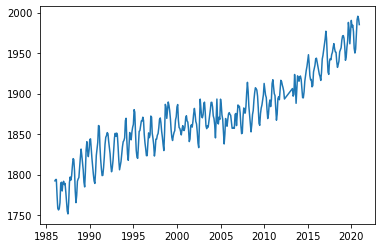

In [2]:
filename = "Month.txt"
data2 = pd.read_csv(filename,skiprows = 139, sep = " ",na_values = -999.99)
data = data2.dropna()
plt.plot(data["time_decimal"], data["value"])

<AxesSubplot:xlabel='time_decimal', ylabel='value'>

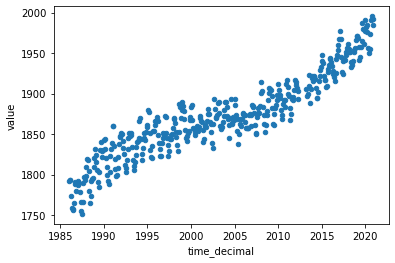

In [3]:
data.plot(kind = 'scatter', x = 'time_decimal', y = 'value')

In [4]:
#data.drop( data[ data['value'] == -999.99 ].index , inplace=True)

It will be easier to manipulate the data if they are `numpy` arrays.

Additionally, if we want to fit the original data to an exponential, we should take the log of the y values
and fit log(y) to a line. By error propogation, the standard deviation $\sigma$ needs to be taken as $\frac{1}{\sigma}$, since $\frac{\partial}{\partial \sigma}\ln(\sigma) = \frac{1}{\sigma}$

In [5]:
graph_value = data['value'].to_numpy()
graph_time = data['time_decimal'].to_numpy()
graph_dev = data['value_std_dev'].to_numpy()

graph_value = np.log(graph_value)
graph_dev
graph_dev = graph_dev/graph_value
print(graph_time[0])
graph_time = graph_time - 1986.0

1986.0


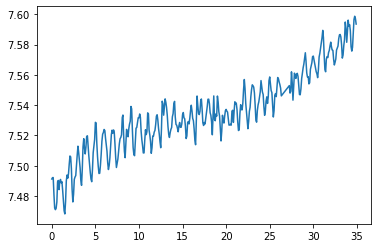

In [6]:
plt.plot(graph_time, graph_value)

Use the `chi_square_fit.py` for this section. This will give us the fitline and the scatter plot for the data.

(7.484641971593028, 0.0026902686094306565, 0.1169269902928036, 0.0052050923401290765, 0.03197961677516847)
 slope = 0.0026902686094306565  +-  0.0052050923401290765
 intercept = 7.484641971593028 +- 0.1169269902928036
 chi-square/d.o.f. =  7.838141366462861e-05


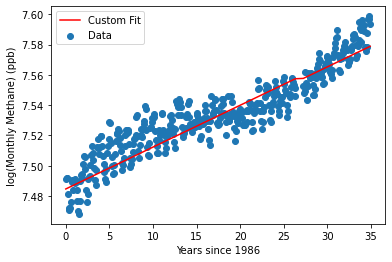

In [7]:
fit = chi_square_fit(graph_time,graph_value,graph_dev)
print(fit)
print (' slope =', fit[1], ' +- ', fit[3])
print (' intercept =', fit[0], '+-', fit[2])
if len(data) - 2 > 0 :
    print (' chi-square/d.o.f. = ', fit[4]/(len(data)-2))
else :
    print (' chi-square/d.o.f. undefined')
data_val = np.linspace(0,35,410)
fitline = fit[0] + fit[1] * data_val

plt.scatter(graph_time, graph_value, label = "Data")
plt.plot(graph_time,fitline, 'r', label = "Custom Fit")
plt.xlabel("Years since 1986")
plt.ylabel("log(Monthly Methane) (ppb)")
plt.legend()
plt.show()

We can do this same analysis for different years to see how the fit is at smaller segments.

In [8]:
def take_years(yr):
    diff = yr - 1985
    mon = 12*diff
    back = mon - 12
    va = graph_value[back:mon]
    ti = graph_time[back:mon]
    de = graph_dev[back:mon]
    print(va)
    print(ti)
    print(de)
    return [ti,va,de]

In [9]:
take_years(1986)

[7.49122151 7.492125   7.49217517 7.48102598 7.47208565 7.47098168
 7.47184675 7.47603627 7.48945121 7.49025019 7.48421695 7.489753  ]
[0.         0.08493151 0.16164384 0.24657534 0.32876712 0.41369863
 0.49589041 0.58082192 0.66575342 0.74794521 0.83287671 0.91506849]
[1.47372494 4.5674625  2.55199586 0.73519328 0.91005381 1.81636103
 2.78512136 3.22764619 5.16993821 4.27489058 1.65281152 2.2030099 ]


[array([0.        , 0.08493151, 0.16164384, 0.24657534, 0.32876712,
        0.41369863, 0.49589041, 0.58082192, 0.66575342, 0.74794521,
        0.83287671, 0.91506849]),
 array([7.49122151, 7.492125  , 7.49217517, 7.48102598, 7.47208565,
        7.47098168, 7.47184675, 7.47603627, 7.48945121, 7.49025019,
        7.48421695, 7.489753  ]),
 array([1.47372494, 4.5674625 , 2.55199586, 0.73519328, 0.91005381,
        1.81636103, 2.78512136, 3.22764619, 5.16993821, 4.27489058,
        1.65281152, 2.2030099 ])]

In [10]:
def yr_fit(yr):
    """
    Fits the data for a specific year.
    
    Args: yr must be an int.
    
    Returns: Plot returned, value returned is chi^2, which is a float.
    
    """
    dat = take_years(yr)
    fit = chi_square_fit(dat[0],dat[1],dat[2])
    print (' slope =', fit[1], ' +- ', fit[3])
    print (' intercept =', fit[0], '+-', fit[2])
    if len(data) - 2 > 0 :
        print (' chi-square/d.o.f. = ', fit[4]/(len(data)-2))
    else :
        print (' chi-square/d.o.f. undefined')
    data_val = np.linspace(0,1,12)
    fitline = fit[0] + fit[1] * data_val
    plt.scatter(dat[0], dat[1], label = "Data")
    plt.plot(dat[0],fitline, 'r', label = "Custom Fit")
    plt.xlabel("The year " + str(yr)+ " , (yrs. from 1986)")
    plt.ylabel("log(Methane) (ppb)")
    plt.legend()
    plt.show()
    return fit[4]/(len(data)-2)

[7.52936349 7.53911216 7.537462   7.52344349 7.51203846 7.50734424
 7.50660277 7.51511579 7.52477707 7.52524097 7.52874029 7.53166492]
[9.         9.08493151 9.16164384 9.24657534 9.32876712 9.41369863
 9.49589041 9.58082192 9.66575342 9.74794521 9.83287671 9.91506849]
[1.9656376  8.79413897 1.56816711 2.59854414 0.6629359  1.69567288
 1.3841148  1.90948488 6.20749287 3.21584386 2.94870047 1.77118873]
 slope = -0.00017451636602017182  +-  2.161051895580406
 intercept = 7.518471277297644 +- 20.305332213004608
 chi-square/d.o.f. =  1.1287567310423052e-06


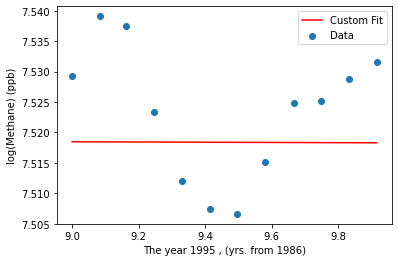

In [11]:
a = yr_fit(1995)

[7.49122151 7.492125   7.49217517 7.48102598 7.47208565 7.47098168
 7.47184675 7.47603627 7.48945121 7.49025019 7.48421695 7.489753  ]
[0.         0.08493151 0.16164384 0.24657534 0.32876712 0.41369863
 0.49589041 0.58082192 0.66575342 0.74794521 0.83287671 0.91506849]
[1.47372494 4.5674625  2.55199586 0.73519328 0.91005381 1.81636103
 2.78512136 3.22764619 5.16993821 4.27489058 1.65281152 2.2030099 ]
 slope = -0.0019603636199691256  +-  1.968883033955576
 intercept = 7.480726444310831 +- 0.8127529241214663
 chi-square/d.o.f. =  5.742387504415293e-07


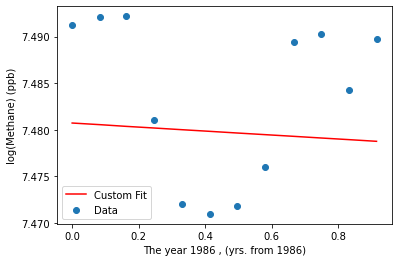

5.742387504415293e-07

In [12]:
yr_fit(1986)

There appears to be some fits that are moderate given the data, but the fits do not seem to be proper. Take for example the year 1999.

[7.54410986 7.54181041 7.53861208 7.53330326 7.52581247 7.52063014
 7.51863436 7.52185925 7.52399442 7.52519783 7.53232914 7.53432453]
[13.         13.08493151 13.16164384 13.24657534 13.32876712 13.41369863
 13.49589041 13.58082192 13.66575342 13.74794521 13.83287671 13.91506849]
[1.70994329 1.29544492 1.48701112 0.60265727 0.62983233 0.9733227
 2.04558425 3.72381336 2.38702995 0.607293   4.34261427 1.13480644]
 slope = -0.011669830547056793  +-  1.1449287394599943
 intercept = 7.685994117765423 +- 15.386629657478021
 chi-square/d.o.f. =  8.809607019470668e-07


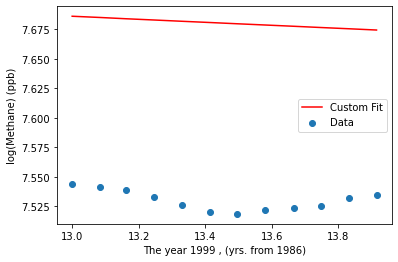

8.809607019470668e-07

In [13]:
yr_fit(1999)

Clearly this fit is off based on the intercept, but the general trendline appears okay. This would require further analysis of the `chi_square_fit` function.

As for comparing the goodness for each curve, we can compare the values of $\chi^2$ for the years.

- 1986: $\chi^2 = 5.742387504415293e-07$ 
- 1995: $\chi^2 = 1.1287567310423052e-06$ 
- 1999: $\chi^2 = 8.809607019470668e-07$